In [1]:
%pylab inline

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

size = 100
grid = np.arange(1, size + 1)

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = sps.cauchy.rvs(size=size, loc=0, scale=1) # генерим выборку размера 100 из распределения Cauchy(0, 1)

Оценка максимального правдоподобия для $\theta$ в $N(\theta, 1)$ - $\overline{X}$

Сопряженное априорное распределение - $N(\mu_{0}, \sigma_{0}^{2})$

$\Rightarrow апостериорное \space распределение - p(\theta \mid X) \sim N(\frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}, \sigma_{1}^2)$

$\Rightarrow байесовская \space оценка - \hat{\theta} = E(\theta | X) = \frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}$

$\sigma^{2} = 1 \Rightarrow \hat{\theta} = \frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \sum^{n}_{i = 1}X_{i} } {\frac{1}{\sigma_{0}^2} + n}$

Нам нужно найти параметры априорного распределения исходя из условия $P_{N(\mu_{0}, \sigma_{0}^{2})}(\theta < 0.5) \geq 0.95$

То есть $F_{N(\mu_{0}, \sigma_{0}^{2})}(0.5) \geq 0.95$

Пусть первым параметром ($\mu_0$) априорного распределния будет 0. Подберем второй параметр исходя из условия:

In [3]:
mu = 0

def search_sigma():
    for sigma in np.arange(5, 0.1, -0.1):
        if sps.norm.cdf(0.5, loc=mu, scale=sigma) >= 0.95:
            return sigma

sigma_sq = search_sigma() ** 2

print 'Полученный второй параметр распределения - ' + str(sigma_sq)

Полученный второй параметр распределения - 0.09


In [4]:
#Считаем оценки
MLE_est = s.cumsum() / np.arange(1, size + 1)

bayes_est = (mu / sigma_sq + s.cumsum()) / (1 / sigma_sq + np.arange(1, size + 1))

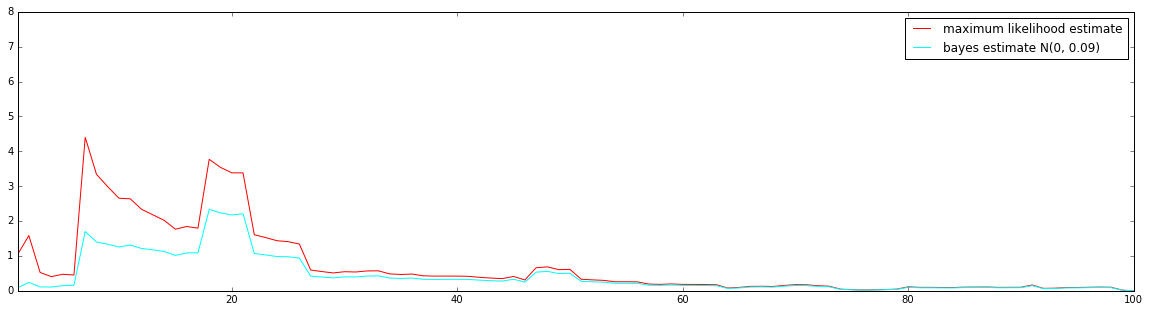

In [5]:
#Строим графики
plt.figure(figsize=(20,5))
plt.ylim((0, 8))
plt.xlim((1, 100))

plt.plot(grid, abs(MLE_est), color='red', label='maximum likelihood estimate')
plt.plot(grid, abs(bayes_est), color='cyan', label='bayes estimate N(' + str(mu) + ', ' + str(sigma_sq) + ')')

plt.legend()
plt.show()

Вывод: получается что-то не слишком адекватное - при разных выборках получается разный характер поведения оценок. Это потому что мы генерим не ту выборку, которую подразумеваем. Но всегда байесовская оценка дает лучший результат. 